# Story Telling - Animal Bites

In [65]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [66]:
#load the raw data
df = pd.read_csv('C:\\Users\\tc18f\\Desktop\\springboard\\20.3 Story Telling\\Data\\Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


From the info, we can see that the most non-null columns goes from
Species > bite_date > WhereBitten > zip > Gender > color, then everything else has only half of non-null than original data.
However, the values within these columns might be messy, so we need to check/clean it first before making any decisions.

In [68]:
# it will make much more sense if the bite_date is the index, but then there are way too many different time/dates
# so we will break this dataset to yearly data
# get the first 4 string of bite_date to get its year
df['bite_date'] = df['bite_date'].str[:4]
# change the column name to year
df=df.rename(columns={'bite_date': 'year'})
#check for unique values and see if there's NaN or values that doesn't make sense
df['year'].sort_values().unique()

array(['1952', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1999', '2001', '2002', '2007',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2020', '2021', '2101', '2201', '5013', nan],
      dtype=object)

In [69]:
# there are some years that doesn't make sense, such as 2021 and above and 1952, let's see how many of those
df['year'].value_counts().head(10)

2012    1180
2014    1176
2011    1148
2013    1145
2010    1131
2016    1051
2015     985
2017     801
2009      14
1992      10
Name: year, dtype: int64

In [70]:
# the top 8 value_counts having more than 8000 rows of data and the years are valid numbers
# so we will drop the years that had weird numbers or nan
# drop the nan by keeping only rows with True values in the year column
df = df[pd.isnull(df['year'])==False]
# convert the year column attribute to number first so we can use > = < signs
df.year = pd.to_numeric(df.year, errors='coerce')
# drop the weird years, basically we want years between 1985 to 2020
df = df[(1985<= df['year']) & (df['year']<=2020)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8678 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               8678 non-null   int64  
 1   SpeciesIDDesc      8577 non-null   object 
 2   BreedIDDesc        3700 non-null   object 
 3   GenderIDDesc       6401 non-null   object 
 4   color              6343 non-null   object 
 5   vaccination_yrs    3696 non-null   float64
 6   vaccination_date   4071 non-null   object 
 7   victim_zip         6891 non-null   object 
 8   AdvIssuedYNDesc    2534 non-null   object 
 9   WhereBittenIDDesc  8350 non-null   object 
 10  quarantine_date    2003 non-null   object 
 11  DispositionIDDesc  1530 non-null   object 
 12  head_sent_date     221 non-null    object 
 13  release_date       1425 non-null   object 
 14  ResultsIDDesc      1368 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ MB


In [71]:
# the column names are hard a pain to read... let's rename them
df.columns = ['year', 'species', 'breed', 'gender','color','vaccination_yrs', 'vaccination_date', 'zip', 'AdvIssuedYN',
       'where_bitten', 'quarantine_date', 'disposition',
       'head_sent_date', 'release_date', 'result']
df.head(3)

,year,species,breed,gender,color,vaccination_yrs,vaccination_date,zip,AdvIssuedYN,where_bitten,quarantine_date,disposition,head_sent_date,release_date,result
0,1985,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN


In [72]:
# check the columns' number of null counts and decide what to do
for i in df.columns:
    print(i, ':', len(df[df[i].isnull()]))

year : 0
species : 101
breed : 4978
gender : 2277
color : 2335
vaccination_yrs : 4982
vaccination_date : 4607
zip : 1787
AdvIssuedYN : 6144
where_bitten : 328
quarantine_date : 6675
disposition : 7148
head_sent_date : 8457
release_date : 7253
result : 7310


In [73]:
# only 101 rows had null values for species, so let's drop them by keeping only rows wtih True values in species column
df = df[pd.notnull(df['species'])]
# only 328 rows had null values for Where Bitten, so let's drop them as well
df = df[pd.notnull(df['where_bitten'])]
len(df) 

8274

In [74]:
# there's a lot of UNKNOWNS, let's change all null values to UNKNOWN
df.replace('UNKNOWN', np.nan, inplace=True)
df.head(3)

,year,species,breed,gender,color,vaccination_yrs,vaccination_date,zip,AdvIssuedYN,where_bitten,quarantine_date,disposition,head_sent_date,release_date,result
0,1985,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,NaN,NaN,NaN,NaN
1,1986,DOG,NaN,NaN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,NaN,NaN,NaN,NaN
2,1987,DOG,NaN,NaN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,NaN,NaN,NaN,NaN


In [75]:
# check the columns' value counts to see values in each column and also print
# sum of value_counts to know the valid number of rows
for i in df.columns:
    print(df[i].value_counts(), df[i].value_counts().sum(), '\n')

2010    1131
2014    1126
2011    1126
2013    1078
2016    1031
2012     995
2015     955
2017     771
2009      14
1992      10
1994       7
1990       6
1993       6
1991       5
1989       2
1988       1
2020       1
1995       1
2007       1
2018       1
2002       1
1986       1
2001       1
1985       1
1999       1
1987       1
Name: year, dtype: int64 8274 

DOG        6704
CAT        1472
BAT          59
RACCOON      19
OTHER         8
HORSE         5
FERRET        4
RABBIT        2
SKUNK         1
Name: species, dtype: int64 8274 

PIT BULL           1055
GERM SHEPHERD       313
LABRADOR RETRIV     235
BOXER               172
CHICHAUHUA          162
                   ... 
CHOCOLATE LAB.        1
IRISH SPANIEL         1
STAN POODLE           1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
Name: breed, Length: 101, dtype: int64 3584 

MALE      3687
FEMALE    1936
Name: gender, dtype: int64 5623 

BLACK         640
BROWN         416
WHITE         378
BLK WHT       269
TAN  

There are some other interesting species, but let's just focus on dog and cat, since majority of the data are about them.

color will be very biased since most of the animals' color depends on breed, so we will drop it.

AdvIssued doesn't really tell us anything, so drop it.

head_sent_date only has 220, might as well drop it.

Result only had 118 and are all negative, we'll drop it

since result of rabid is dropped, let's drop quarantine and vaccination related columns as well

Disposition were mostly released, drop it.

zip has nothing much to do... since the data is from same city, drop it

In [76]:
# let's display the columns so it's easier to find out which ones to drop
df.columns

Index(['year', 'species', 'breed', 'gender', 'color', 'vaccination_yrs',
       'vaccination_date', 'zip', 'AdvIssuedYN', 'where_bitten',
       'quarantine_date', 'disposition', 'head_sent_date', 'release_date',
       'result'],
      dtype='object')

In [77]:
# drop the mentioned columns
df.drop(columns=['color', 'vaccination_yrs', 'vaccination_date', 'zip', 'AdvIssuedYN', 'quarantine_date',
                 'disposition', 'head_sent_date', 'release_date', 'result'], inplace=True)
# keep only dog and cat in species
df = df[df.species.isin(['DOG','CAT'])]

#take a look again
for i in df.columns:
    print(df[i].value_counts(), df[i].value_counts().sum(), '\n')

2014    1119
2010    1116
2011    1106
2013    1072
2016    1005
2012     993
2015     947
2017     757
2009      14
1992      10
1994       7
1993       6
1990       6
1991       5
1989       2
1985       1
2020       1
1986       1
2001       1
2002       1
2018       1
1987       1
1995       1
1999       1
2007       1
1988       1
Name: year, dtype: int64 8176 

DOG    6704
CAT    1472
Name: species, dtype: int64 8176 

PIT BULL           1055
GERM SHEPHERD       313
LABRADOR RETRIV     235
BOXER               172
CHICHAUHUA          162
                   ... 
CHOCOLATE LAB.        1
IRISH SPANIEL         1
STAN POODLE           1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
Name: breed, Length: 101, dtype: int64 3584 

MALE      3685
FEMALE    1934
Name: gender, dtype: int64 5619 

BODY    6072
HEAD    1224
Name: where_bitten, dtype: int64 7296 



In [78]:
# about 2500 rows of data has gender are missing, let's fillna with Unknown
df['gender'].fillna('unknown', inplace=True)
# about 900 rows of data doesn't have where bitten, let's just drop the 900 we wtill have 7000+ rows of data
df = df[pd.notnull(df['where_bitten'])]
len(df)

7296

In [79]:
# fillna with Unknown for breed as well
df['breed'].fillna('unknown', inplace=True)
# let's view the top 20 breeds
df.breed.value_counts().head(20)

unknown              4092
PIT BULL              961
GERM SHEPHERD         287
LABRADOR RETRIV       198
BOXER                 160
CHICHAUHUA            145
SHIH TZU              105
BEAGLE                 89
ROTTWEILER             72
AAUST. TERR.           67
DACHSHUND              59
GOLD RETRIEVER         50
YORKSHIRE TERRIER      41
CHOW CHOW              40
CANE CORSO             38
POODLE                 35
SCHNAUZER              35
BORDER COLLIE          34
GREAT DANE             34
POMERANIAN             33
Name: breed, dtype: int64

In [80]:
# what about cat breeds
df.breed[df.species=='CAT'].value_counts().head(20)

unknown    1227
OTHER         1
Name: breed, dtype: int64

In [81]:
# since there are almost no cat breeds, let's just say "CAT(no breeds)" for their breed
df.breed[df.species=='CAT']='CAT(no breeds)'

<ipython-input-81-1695d279a87b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.breed[df.species=='CAT']='CAT(no breeds)'


In [82]:
#there might be repeats due to abbreviations let's do word check and see
display('GERM SHEPHER: {}; should be 287'.format(len(df[df['breed'].str.contains('GERM')])))
display('LABRADOR RETRIV: {}; should be 198'.format(len(df[df['breed'].str.contains('LAB')])))
display('ROTTWEILER: {}; should be 72'.format(len(df[df['breed'].str.contains('ROT')])))
display('GOLD RETRIEVER: {}; should be 50'.format(len(df[df['breed'].str.contains('GOLD')])))

'GERM SHEPHER: 287; should be 287'

'LABRADOR RETRIV: 223; should be 198'

'ROTTWEILER: 72; should be 72'

'GOLD RETRIEVER: 53; should be 50'

In [83]:
# check for any breed that contains RETR but not in top 20 (checking for any kind of retrievers)
df[(df['breed'].str.contains('RETR')) & ~(df.breed.isin(['LABRADOR RETRIV','GOLD RETRIEVER']))]

,year,species,breed,gender,where_bitten


In [84]:
# let's take a look at the breeds that ontained LAB but not LABRADOR RETRIV
df[(df['breed'].str.contains('LAB')) & (df['breed']!='LABRADOR RETRIV')]

,year,species,breed,gender,where_bitten
4843,2013,DOG,BLACK LAB,unknown,BODY
4894,2013,DOG,BLACK LAB,FEMALE,HEAD
5138,2014,DOG,CHOCOLATE LAB.,unknown,BODY
6133,2014,DOG,BLACK LAB,FEMALE,BODY
6176,2014,DOG,BLACK LAB,unknown,BODY
6193,2014,DOG,BLACK LAB,unknown,HEAD
6233,2015,DOG,BLACK LAB,MALE,BODY
6287,2015,DOG,BLACK LAB,MALE,BODY
6348,2015,DOG,BLACK LAB,FEMALE,BODY
6483,2015,DOG,BLACK LAB,FEMALE,BODY


In [85]:
# they are still labrador retriv so let's rename those
df['breed'].replace(['BLACK LAB','CHOCOLATE LAB.','GOLDEN LAB'], 'LABRADOR RETRIV', inplace=True)
len(df[(df['breed'].str.contains('LAB')) & (df['breed']!='LABRADOR RETRIV')])
# this also took care of the 'GOLD' containg breeds that weren't GOLDEN RETRIEVER, since there were 3 GOLDEN LAB

0

In [86]:
# change the columns to title format to make it look neater
df.columns = [str(i).title() for i in list(df.columns)]

In [87]:
df.columns

Index(['Year', 'Species', 'Breed', 'Gender', 'Where_Bitten'], dtype='object')

In [88]:
# change the values to title format as well
for i in list(df.columns)[1:5]:
    df[i] = df[i].str.title()
df.head(2)

,Year,Species,Breed,Gender,Where_Bitten
0,1985,Dog,Unknown,Female,Body
1,1986,Dog,Unknown,Unknown,Body


In [89]:
# let's take a look at Breeds again and focus on its top 10
display(df.Breed.value_counts().head(12)) # 12 because Unknown isn't really a species and so is Cat

Unknown            2865
Cat(No Breeds)     1228
Pit Bull            961
Germ Shepherd       287
Labrador Retriv     223
Boxer               160
Chichauhua          145
Shih Tzu            105
Beagle               89
Rottweiler           72
Aaust. Terr.         67
Dachshund            59
Name: Breed, dtype: int64

In [90]:
# create a list for the top 10
top10 = df.Breed.value_counts().head(12).to_frame()
top10_list = list(top10.index)
top10_list

['Unknown',
 'Cat(No Breeds)',
 'Pit Bull',
 'Germ Shepherd',
 'Labrador Retriv',
 'Boxer',
 'Chichauhua',
 'Shih Tzu',
 'Beagle',
 'Rottweiler',
 'Aaust. Terr.',
 'Dachshund']

In [91]:
#let's find out how many other breeds are there
len(df.Breed[~df.Breed.isin(top10_list)].unique())

87

In [92]:
# change the breeds taht aren't in the list to Other(Dog)
# change it then view the value counts which should have total of 13 rows (Unkonwn, Other, and Cat arne't specific breed)
df.Breed[~df.Breed.isin(top10_list)] = 'Other(Dog)'
df.Breed.value_counts()

<ipython-input-92-c9a985cd2aa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Breed[~df.Breed.isin(top10_list)] = 'Other(Dog)'


Unknown            2865
Cat(No Breeds)     1228
Other(Dog)         1035
Pit Bull            961
Germ Shepherd       287
Labrador Retriv     223
Boxer               160
Chichauhua          145
Shih Tzu            105
Beagle               89
Rottweiler           72
Aaust. Terr.         67
Dachshund            59
Name: Breed, dtype: int64

In [93]:
# let's change Unknown to Unknown(Dog)
df.Breed.replace('Unknown','Unknown(Dog)', inplace=True)

In [94]:
# make a different dataframe to get the frequency information for common query
year_list = list(df.Year.unique())
#convert list's element to int
year_list = [int(i) for i in year_list] 
# sort
year_list.sort()
freq_dict = ({'Year':year_list,
              'Dog': [len(df[(df.Species=='Dog') & (df.Year==int(i))])for i in year_list],
              'Cat': [len(df[(df.Species=='Cat') & (df.Year==int(i))])for i in year_list],
              'Female': [len(df[(df.Gender=='Female') & (df.Year==int(i))])for i in year_list],
              'Male': [len(df[(df.Gender=='Male') & (df.Year==int(i))])for i in year_list],
              'Unknown_Sex': [len(df[(df.Gender=='Unknown') & (df.Year==int(i))])for i in year_list],
              'Body': [len(df[(df.Where_Bitten=='Body') & (df.Year==int(i))])for i in year_list],
              'Head': [len(df[(df.Where_Bitten=='Head') & (df.Year==int(i))])for i in year_list],
              'Dog(M)': [len(df[(df.Species=='Dog') & (df.Gender=='Male') & (df.Year==i)]) for i in year_list],
              'Dog(F)': [len(df[(df.Species=='Dog') & (df.Gender=='Female') & (df.Year==i)]) for i in year_list],
              'Cat(M)': [len(df[(df.Species=='Cat') & (df.Gender=='Male') & (df.Year==i)]) for i in year_list],
              'Cat(F)': [len(df[(df.Species=='Cat') & (df.Gender=='Female') & (df.Year==i)]) for i in year_list],
              'Total': [len(df[df.Year==int(i)])for i in year_list],
             })
df2 = pd.DataFrame.from_dict(freq_dict)
# set the year column as index
df2.head()

,Year,Dog,Cat,Female,Male,Unknown_Sex,Body,Head,Dog(M),Dog(F),Cat(M),Cat(F),Total
0,1985,1,0,1,0,0,1,0,0,1,0,0,1
1,1986,1,0,0,0,1,1,0,0,0,0,0,1
2,1987,1,0,0,0,1,1,0,0,0,0,0,1
3,1988,1,0,0,1,0,1,0,1,0,0,0,1
4,1989,2,0,1,0,1,2,0,0,1,0,0,2


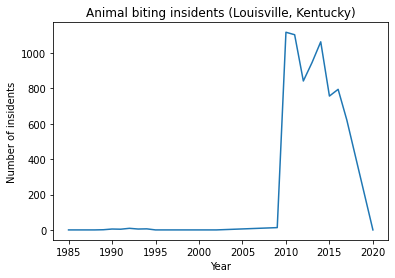

In [95]:
# let's do a quick yearly insidents
plt.plot(df2.Year, df2.Total)
plt.xlabel('Year')
plt.ylabel('Number of insidents')
plt.title('Animal biting insidents (Louisville, Kentucky)')
plt.show() #looks like the data isn't really collected until somewhere around 2009 then stopped again around 2016

In [96]:
df2.tail(10)

,Year,Dog,Cat,Female,Male,Unknown_Sex,Body,Head,Dog(M),Dog(F),Cat(M),Cat(F),Total
14,2009,12,2,4,7,3,11,3,6,3,1,1,14
15,2010,892,224,252,406,458,939,177,354,198,52,54,1116
16,2011,890,212,211,490,401,931,171,430,161,60,50,1102
17,2012,701,140,199,377,265,703,138,320,166,57,33,841
18,2013,771,174,227,453,265,794,151,380,186,73,41,945
19,2014,881,181,284,503,275,876,186,432,223,71,61,1062
20,2015,640,116,218,375,163,625,131,333,178,42,40,756
21,2016,689,105,185,424,185,648,146,382,150,42,35,794
22,2017,550,71,163,314,144,506,115,284,142,30,21,621
23,2020,0,1,0,1,0,1,0,0,0,1,0,1


It looks like most of the data are from 2010 to 2017, let's keep only the rows in those time. It doesn't make sense to have such a dramatic increase/decrease. And year 2018,2019 are both missing.

In [97]:
df2 = df2[(df2.Year<=2017) & (df2.Year>=2010)]
df2

,Year,Dog,Cat,Female,Male,Unknown_Sex,Body,Head,Dog(M),Dog(F),Cat(M),Cat(F),Total
15,2010,892,224,252,406,458,939,177,354,198,52,54,1116
16,2011,890,212,211,490,401,931,171,430,161,60,50,1102
17,2012,701,140,199,377,265,703,138,320,166,57,33,841
18,2013,771,174,227,453,265,794,151,380,186,73,41,945
19,2014,881,181,284,503,275,876,186,432,223,71,61,1062
20,2015,640,116,218,375,163,625,131,333,178,42,40,756
21,2016,689,105,185,424,185,648,146,382,150,42,35,794
22,2017,550,71,163,314,144,506,115,284,142,30,21,621


In [98]:
# let's also do the same to df
df = df[(df.Year<=2017) & (df.Year>=2010)]

In [99]:
# make a different dataframe to get the frequency information by breed
year_list = list(df.Year.unique())
#convert list's element to int
year_list = [int(i) for i in year_list] 
# sort
year_list.sort()
# get all breeds in a list to iterate
breed_list = list(df.Breed.unique())
# create a frequency dict
breed_freq_dict = {'year':year_list}
# use a for loop to add additional key/values
for breed in breed_list:
    breed_freq_dict[breed] = [len(df[(df.Breed==breed) & (df.Year==int(i))])for i in year_list]
# change it to a dataframe 
breed_freq_df = pd.DataFrame.from_dict(breed_freq_dict)
# 2010 didn't really record breeds, so we will drop the first row
breed_freq_df = breed_freq_df.iloc[1:]
breed_freq_df

,year,Unknown(Dog),Cat(No Breeds),Germ Shepherd,Dachshund,Pit Bull,Shih Tzu,Other(Dog),Chichauhua,Beagle,Boxer,Aaust. Terr.,Labrador Retriv,Rottweiler
1,2011,483,212,30,13,108,23,141,20,12,23,4,22,11
2,2012,302,140,42,10,109,9,138,19,17,15,9,23,8
3,2013,335,174,24,4,130,18,152,19,12,21,11,33,12
4,2014,410,181,40,14,135,13,166,31,7,16,7,31,11
5,2015,132,116,52,5,147,21,148,20,14,34,17,38,12
6,2016,142,105,62,5,180,13,174,21,14,21,6,38,13
7,2017,119,71,36,7,150,8,116,15,13,30,13,38,5


In [100]:
#let's view the total number of incidents throught the year by breed
# so we can get its index and use as a list to order the melted df
sum_df = breed_freq_df.sum(axis=0).sort_values(ascending=False).to_frame()
sum_df

,0
year,14098
Unknown(Dog),1923
Other(Dog),1035
Cat(No Breeds),999
Pit Bull,959
Germ Shepherd,286
Labrador Retriv,223
Boxer,160
Chichauhua,145
Shih Tzu,105


In [104]:
# we want to break it down to only 3 columns, year, breed, frequency
breed_melt_df = pd.melt(breed_freq_df, id_vars=['year'], value_vars=list(sum_df.index)[1:], 
        var_name='breed', value_name='counts')
breed_melt_df

,year,breed,counts
0,2011,Unknown(Dog),483
1,2012,Unknown(Dog),302
2,2013,Unknown(Dog),335
3,2014,Unknown(Dog),410
4,2015,Unknown(Dog),132
...,...,...,...
86,2013,Dachshund,4
87,2014,Dachshund,14
88,2015,Dachshund,5
89,2016,Dachshund,5


In [37]:
# we will make a difference df between 2011 and 2017
# breed difference between 2011 and 2017, 2010 the data did not collect the breed information
breed2011 = df.Breed[df.Year==2011].value_counts().to_frame()
breed2017 = df.Breed[df.Year==2017].value_counts().to_frame()
# but before that let's add the total Dog cases for those years
# get the total dog incidents for those years
dog2011 = len(df[(df.Year==2011) & (df.Species=='Dog')])
dog2017 = len(df[(df.Year==2017) & (df.Species=='Dog')])
# extract the index and values to lists so we can remake them into dataframe later
index2011 = list(breed2011.index)
index2017 = list(breed2017.index)
values2011 = list(breed2011.Breed)
values2017 = list(breed2017.Breed)
# append the new index and value for All Dogs
index2011.append('All Dogs')
index2017.append('All Dogs')
values2011.append(dog2011)
values2017.append(dog2017)
# make new dataframes with update key/value
breed2011u = pd.DataFrame({'Breed': values2011}, index=index2011)
breed2017u = pd.DataFrame({'Breed': values2017}, index=index2017)
# create a difference dataframe
diff_df = round((breed2017u-breed2011u)/breed2011u*100, 1)
diff_df['2011'] = breed2011u
diff_df['2017'] = breed2017u
diff_df['Difference'] = breed2017u-breed2011u
# change the column name to difference
diff_df.columns=(['Difference(%)', '2011','2017','Difference'])
# sort the index by Difference's values in decending order
diff_df = diff_df.sort_values('Difference(%)')
diff_df

,Difference(%),2011,2017,Difference
Unknown(Dog),-75.4,483,119,-364
Cat(No Breeds),-66.5,212,71,-141
Shih Tzu,-65.2,23,8,-15
Rottweiler,-54.5,11,5,-6
Dachshund,-46.2,13,7,-6
All Dogs,-38.2,890,550,-340
Chichauhua,-25.0,20,15,-5
Other(Dog),-17.7,141,116,-25
Beagle,8.3,12,13,1
Germ Shepherd,20.0,30,36,6


In [38]:
# save the dfs to as excel files
df.to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\20.3 Story Telling\\Data\\AnimalBitesClean.csv', index=False)
df2.to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\20.3 Story Telling\\Data\\AnimalBitesFreq.csv', index=False)
breed_melt_df.to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\20.3 Story Telling\\Data\\AnimalBitesBreedYearFreq.csv', index=False)

# Visualizations

In [39]:
# change the directory to save figures
path="C:\\Users\\tc18f\\Desktop\\springboard\\20.3 Story Telling\\Figures"
os.chdir(path)

Now that the data are cleaned, we are left with Year, Species, Gender, and Where_Bitten.
So the most concerning question will be, if the number of animal bite incidents are increasing or decreasing over time. Consider the fact that population grows at an exponential rate, it's likely to be increasing. But this is exactly why we need data.

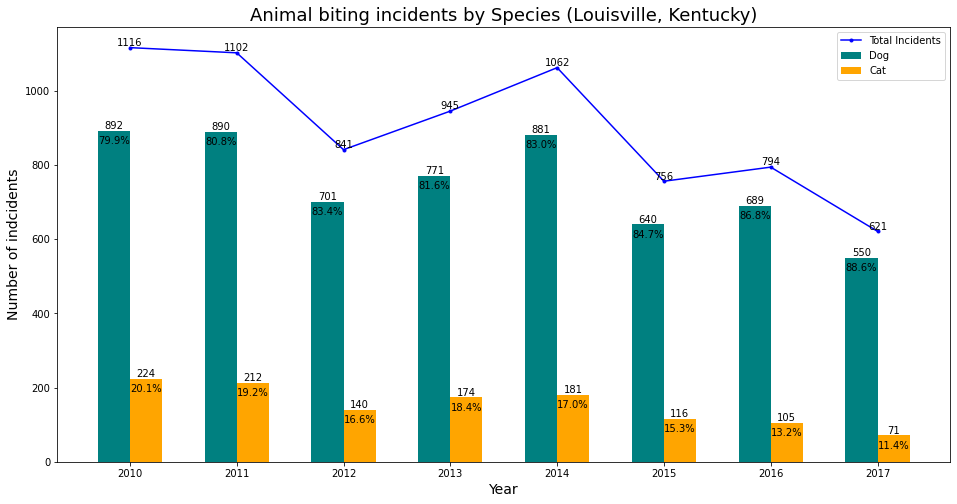

In [40]:
#yearly total incidents and by species
#set the x_labels
x_labels = df2.Year

# the label locations
x = np.arange(len(x_labels))

# plot the lines
fig, ax = plt.subplots(figsize=(16,8))
line1 = ax.plot(x, df2.Total, marker='.', label='Total Incidents', color='blue')
#line2 = ax.plot(x, df2.Dog, marker='.', label='Dog', color='teal')
#line3 = ax.plot(x, df2.Cat, marker='.', label='Cat', color='orange')

# plot bars
# set width of a bar 
width = 0.3       
bar1 = plt.bar(x - width/2, df2.Dog , width, color='teal', label='Dog')
bar2 = plt.bar(x + width/2, df2.Cat, width, color='orange', label='Cat')

# labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of indcidents', fontsize=14)
ax.set_title('Animal biting incidents by Species (Louisville, Kentucky)', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# define annotate_first_last to annotate starting and endpoint point in line plot
def annotate_lines(lines):
    """Display points' value"""
    for line in lines:
        for p in range(len(x)):
            height = line.get_ydata()[p]
            ax.annotate('{}'.format(height),
                        xy=(line.get_xdata()[p], height),
                        xytext=(0, 0),  # location of where to annotate; right at where the point is at
                        textcoords="offset points",
                        ha='center', va='bottom')
# define a function to label bar values
def annotate_bars(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 0),  # annotate 0 points above the top of the rectangle
                    textcoords="offset points",
                    ha='center', va='bottom')
def annotate_bars_comp(bars, comp):
    """annotate the % of bar's value divide by comparison's value"""
    count = 0
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(str(round(height/list(comp)[count]*100, 1)) + '%'),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -15),  # annotate 0 points above the top of the rectangle
                    textcoords="offset points",
                    ha='center', va='bottom')
        count += 1
annotate_lines(line1)
annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars_comp(bar1, df2.Total)
annotate_bars_comp(bar2, df2.Total)
# display and save the figure
plt.savefig('Year x Total & Species.png')

From the blue line, we can see the decreasing trend in total number of incidents over time.

This tell us that either the people are doing a good job avoiding animals/training their pet. Or the number of animals are reducing (we don't have the data to find out the answer).

The bar graphs shows the specie's related incidents and its percentage out of the total amount of incidents. The plots tells us that incidents caused by Cats seems to have decreased more than Dogs, but it could be that there are much more dogs than cats over the years, and thus there are much more incident caused by dogs than cats. Once again, we do not have enough data to have a strong supporting evidence to make such conclusion.

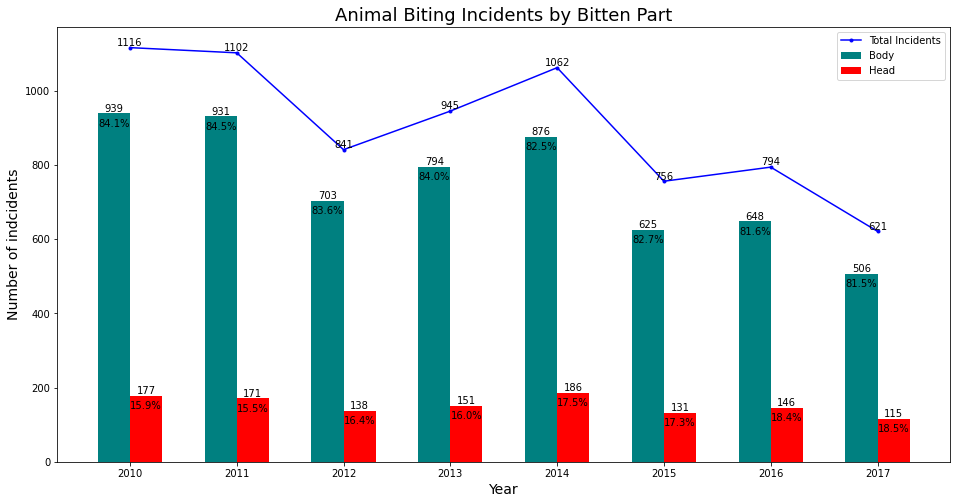

In [41]:
#yearly total incidents by bitten part
#set the x_labels
x_labels = df2.Year

# the label locations
x = np.arange(len(x_labels))

# plot the lines
fig, ax = plt.subplots(figsize=(16,8))
line1 = ax.plot(x, df2.Total, marker='.', label='Total Incidents', color='blue')

# plot bars
# set width of a bar 
width = 0.3       
bar1 = plt.bar(x - width/2, df2.Body , width, color='teal', label='Body')
bar2 = plt.bar(x + width/2, df2.Head, width, color='red', label='Head')

# labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of indcidents', fontsize=14)
ax.set_title('Animal Biting Incidents by Bitten Part', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# annotate
annotate_lines(line1)
annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars_comp(bar1, df2.Total)
annotate_bars_comp(bar2, df2.Total)
# display and save the figure
plt.savefig('Year x Total & Bitten parts.png')

The number of incidents where Body was bitten has greatly decreased over time. But the above plots isn't too easy for us to tell which one improved more. So let's view the difference between each year.

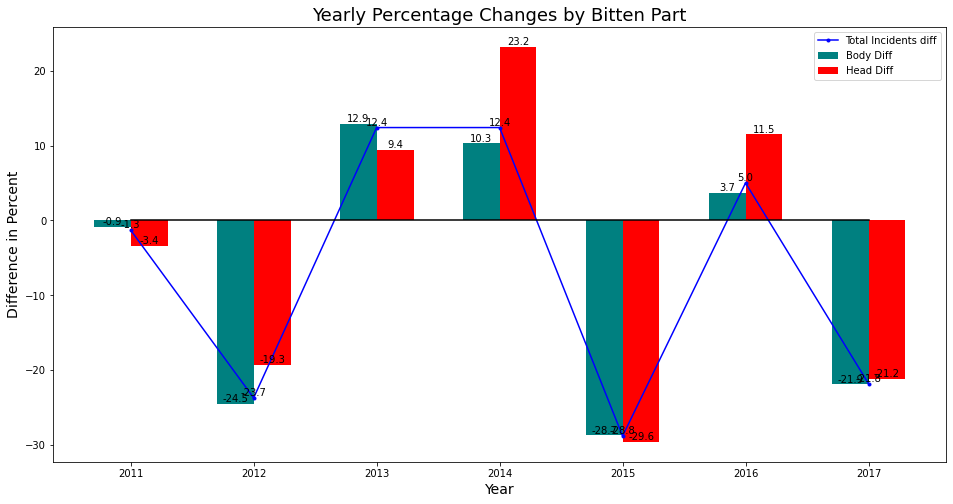

In [42]:
# difference between current ane previous year
#set the x_labels
x_labels = [i for i in range(2011,2018)]

# the label locations
x = np.array(x_labels)

# plot the lines
fig, ax = plt.subplots(figsize=(16,8))
line1 = ax.plot(x, [round((df2.Total.iloc[i+1]-df2.Total.iloc[i])*100/df2.Total.iloc[i], 1) for i in range(7)],
                marker='.', label='Total Incidents diff', color='blue')

# add a line at y=0 for easier viewing which years are doing better than previous year
ax.plot(x, [0 for i in range(len(x_labels))], color='black')

# set width of a bar 
width = 0.3
# plot bars, number of incidents difference between current and previous year
bar1 = plt.bar(x - width/2, [round((df2.Body.iloc[i+1]-df2.Body.iloc[i])*100/df2.Body.iloc[i], 1) for i in range(7)],
               width, color='teal', label='Body Diff')
bar2 = plt.bar(x + width/2, [round((df2.Head.iloc[i+1]-df2.Head.iloc[i])*100/df2.Head.iloc[i], 1) for i in range(7)],
               width, color='red', label='Head Diff')

# labels, title and custom x-axis tick labels, etc.
ax.set_title('Yearly Percentage Changes by Bitten Part', fontsize=18)
ax.set_ylabel('Difference in Percent', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# annotate
annotate_lines(line1)
annotate_bars(bar1)
annotate_bars(bar2)
# display and save the figure
plt.savefig('Difference Bitten parts.png')

The blue line shows the overall difference across all incidents, which shows improvement.

As we can see, it is hard to tell if there are improvements specificly pointing towards incidents involved in biting body or head (we want the values to be below 0).

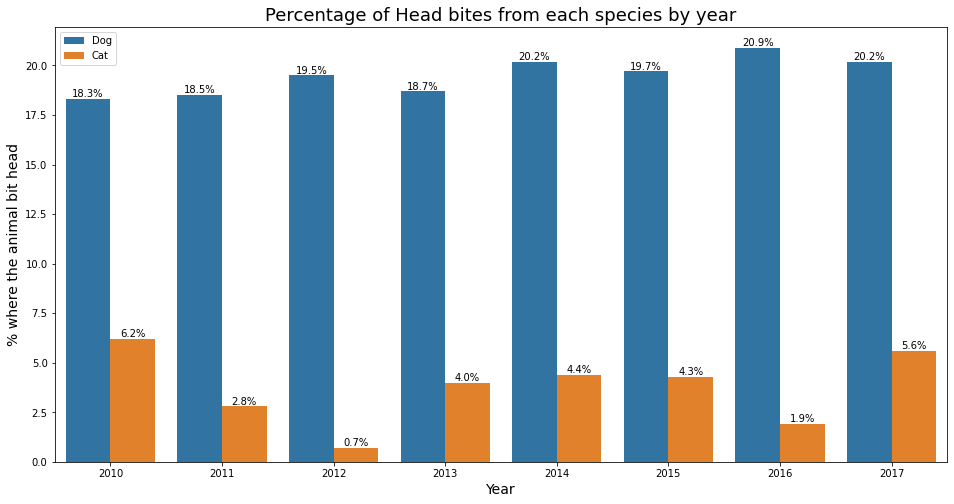

In [43]:
# 2010 vs 2017 who's bitting head?
# get the sum of bite by species by year, create 2 empty lists to store the values
total_dog = []
total_cat = []
#iterate to append the values to lists
for i in range(2010,2018):
    total_dog.append(len(df[(df.Year==i) & (df.Species=='Dog')])) # append total dog related incidents by year
    total_cat.append(len(df[(df.Year==i) & (df.Species=='Cat')])) # do the same for cat

# get the % of head bites based on species and year
# create 2 empty lists to store the values
perc_head_dog = []
perc_head_cat = []
#iterate to append the values to lists
for i in range(2010,2018):
    """calculate the % where specific species bit head in certain year"""
    dog_perc = len(df[(df.Where_Bitten=='Head') & (df.Species=='Dog') & (df.Year==i)]) * 100 / total_dog[i-2010]
    cat_perc = len(df[(df.Where_Bitten=='Head') & (df.Species=='Cat') & (df.Year==i)]) * 100 / total_cat[i-2010]
    # append to the perc lists
    perc_head_dog.append(round(dog_perc, 1))
    perc_head_cat.append(round(cat_perc, 1))

# make dfs with these info
# df with dog's info
df_dog = pd.DataFrame({'year':range(2010, 2018),
                        'total': total_dog,
                        'percentage': perc_head_dog,
                        'species': ['Dog' for i in range(8)]
                       })
# df with cat
df_cat = pd.DataFrame({'year':range(2010, 2018),
                        'total': total_cat,
                        'percentage': perc_head_cat,
                        'species': ['Cat' for i in range(8)]
                       })
# combine both
df_perc = pd.concat([df_dog, df_cat])

#set the fig/axe
fig, ax = plt.subplots(figsize=(16,8))
# plot
sns.barplot(x='year', y='percentage', data=df_perc, ax=ax, hue='species', dodge=True)

# labels, title and custom x-axis tick labels, etc.
ax.set_title('Percentage of Head bites from each species by year', fontsize=18)
ax.set_ylabel('% where the animal bit head', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend()

# annotate bars with dog's info
for index, row in df_dog.iterrows():
    ax.text(x=(row.year-2010-0.2), y=row.percentage+0.1, s=str(round(row.percentage, 1))+'%', color='black', ha="center")
# annotate bars with cat's info
for index, row in df_cat.iterrows():
    ax.text(x=(row.year-2010+0.2), y=row.percentage+0.1, s=str(round(row.percentage, 1))+'%', color='black', ha="center")
# display and save the figure
plt.savefig('head_bites_comparison.png')

From the bar graph above, we can see that dogs on average through out the year have about 20% chance to bite a person's head, while cats have about 5% chance to bite a person's head.

We still have gender column to explored, so elt's take a quick view of incidents by animal's gender.

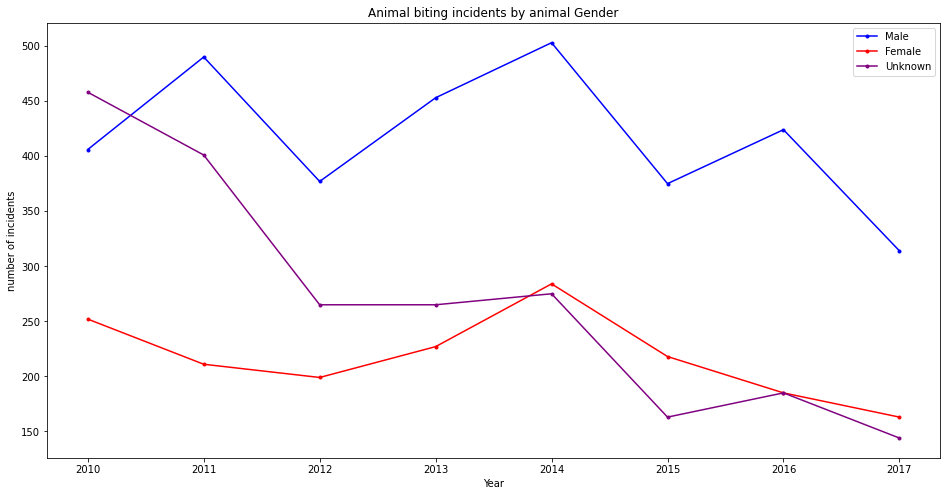

In [44]:
# yearly animal bites and gender
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(df2.Year, df2.Male, marker='.', label='Male', color='b')
plt.plot(df2.Year, df2.Female, marker='.', label='Female', color='r')
plt.plot(df2.Year, df2.Unknown_Sex, marker='.', label='Unknown', color='purple')
plt.xlabel('Year')
plt.ylabel('number of incidents')
plt.title('Animal biting incidents by animal Gender')
plt.legend()
plt.savefig('Year x Gender.png')

From the plot above, we can see that the Unknown gender has decreased by a great amount, it had more cases where the gender was unknown in 2010 and now it is the least cases in 2017. This suggest that the animal biting incident is properly reported, which may be because there are less strays (you are less likely to find out an animal's sex if the animal bit you and ran away).

Finally let's do time x gender x species and see if we can get any information.

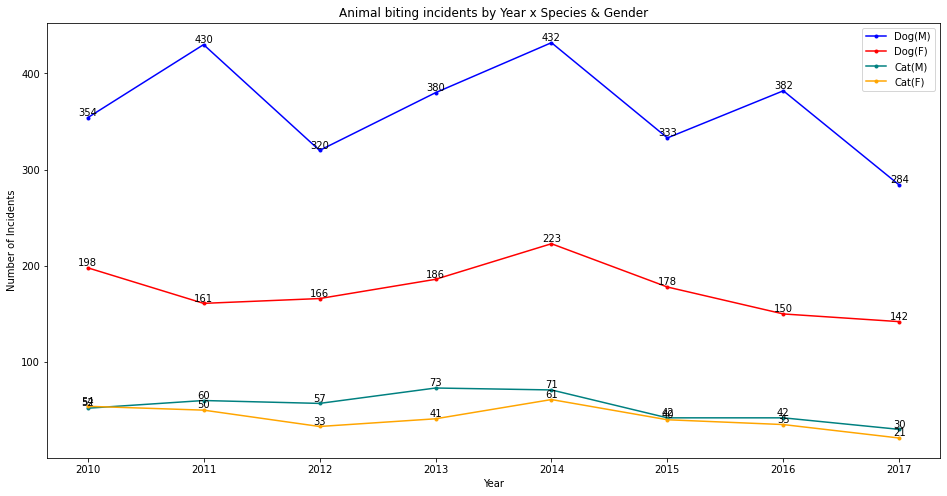

In [45]:
# yearly incident by species and gender
# set the x, which is year
x = df2.Year
# plotting the lines
fig, ax = plt.subplots(figsize=(16,8))
line1 = plt.plot(x, df2['Dog(M)'], label = "Dog(M)", marker='.', color='b')
line2 = plt.plot(x, df2['Dog(F)'], label = "Dog(F)", marker='.', color='r')
line3 = plt.plot(x, df2['Cat(M)'], label = "Cat(M)", marker='.', color='teal')
line4 = plt.plot(x, df2['Cat(F)'], label = "Cat(F)", marker='.', color='orange')
# label x, y, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Animal biting incidents by Year x Species & Gender')
plt.legend()

# annotate
annotate_lines(line1)
annotate_lines(line2)
annotate_lines(line3)
annotate_lines(line4)
# display and savefig
plt.savefig('Year x Species X Gender.png')

This information is for incidents where the gender of the animal was reported, so it may be biased to house hold pets instead of strays. Since the victim can definitely find out and report the animal's gender if the victim was bitten at the house hold, while less likely to do so if the animal was a stray (bit and ran away).

It looks like male Dogs are behaving weridly depending on the year. The plots are zig-zagging a lot unlike others.

All species disregard of their gender are less likely to be bite people than before (since they all have downward slope, it means they are either not causing insidents as much or their numbers are decreasing over time).

Next we will focus on the breeds of the species (cat had no specific breeds).

Text(0.5, 0, 'Number of Incidents')

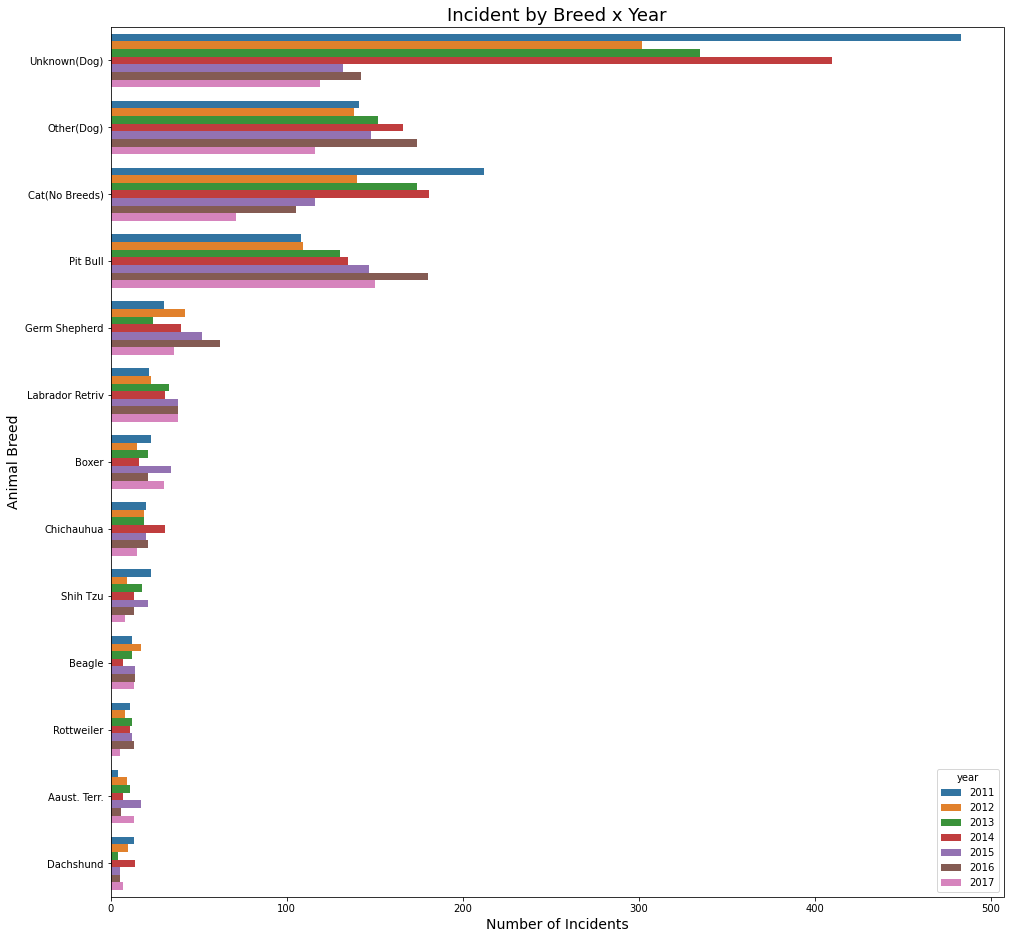

In [106]:
# number of incidents by species & year
# set fig size and axes
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.barplot(x='counts', y='breed', hue='year', data=breed_melt_df)

# labels, title and custom x-axis tick labels, etc.
ax.set_title('Incident by Breed x Year', fontsize=18)
ax.set_ylabel('Animal Breed', fontsize=14)
ax.set_xlabel('Number of Incidents', fontsize=14)

This visualization answers our major concern/question.
Are the number of animal bites incidents reducing throught time?
Yes, overall, the number of incidents have greatly reduced.

Which breeds are causing the incidents more than the other?
While the data has pit bulls causing more incident, it doesn't necessary mean they are more dangerous, since the data does not provide the total number of pit bulls and other breeds in Louisville, we are unable to gauge how dangerous they are when compared to other breeds. e.g. Louisville  could be a town of pitbull lovers where majority of the dogs are pitbulls, then ofcourse more incidents were caused by pit bulls.

There seems to be great improvement on Unknown(dog) and cats, this may suggest a reduction in straw dogs, since it's unlikely to find the species' breed if the incident was caused by a straw animal; the animal/person are more likely to have ran away after the incident and thus less likely to be able to identify the breed.

Other (dogs) are specific breeds, but the sum of these breeds were 87, so it doesn't mean species that aren't specified in this chart are more dangerous.

In order to find out which breed should people be concerened, we need to know the total number of these specific breeds living in Louseville, Kentucky. Otherwise, we cannot say any specific breed is more dangerous than another from current dataset.